<a href="https://colab.research.google.com/github/danielh33/talentoTechAnDaBasico/blob/main/limpieza_datos_practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Limpiena de datos**

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from google.colab import drive # Traemos la clase drive, dentro del módulo colab, del paquete google
drive.mount('/content/drive') # Establecemos la conexión através del método mount

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/TALENTO_TECH_ANALISIS_DATOS_BASICO/practica2/dataset_banco.csv'
data = pd.read_csv(path)

In [3]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:


In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [6]:
#for col in data.columns:
#    print(col)
# Conteo de los niveles en las diferentes columnas categóricas
# cols_cat = ['job', 'material', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in data.columns:
  print(f'Columna {col}: {data[col].nunique ()} subniveles')

Columna age: 85 subniveles
Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna balance: 7168 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna day: 31 subniveles
Columna month: 12 subniveles
Columna duration: 1573 subniveles
Columna campaign: 48 subniveles
Columna pdays: 559 subniveles
Columna previous: 41 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


**Notas acerca de ciclo FOR**

for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.
```
print(f'Columna {col}: {data[col].nunique()} subniveles')
# Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.
```
```
f'Columna {col}: {data[col].nunique()} subniveles'
# Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
```
```
{data[col].nunique()}
# Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.
```

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [75]:
# Calcula la media del atributo 'pdays: días de contacto del usuario antes de la campaña actual'.
media = data['pdays'].mean()
print("Promedio de días de contacto: ", media)

media_filtrada = data['pdays'].loc[data['pdays'] > -1].mean()
print("Promedio de días de contacto sin contar valores -1: ", media_filtrada)

Promedio de días de contacto:  40.177709444063446
Promedio de días de contacto sin contar valores -1:  224.53689567430027


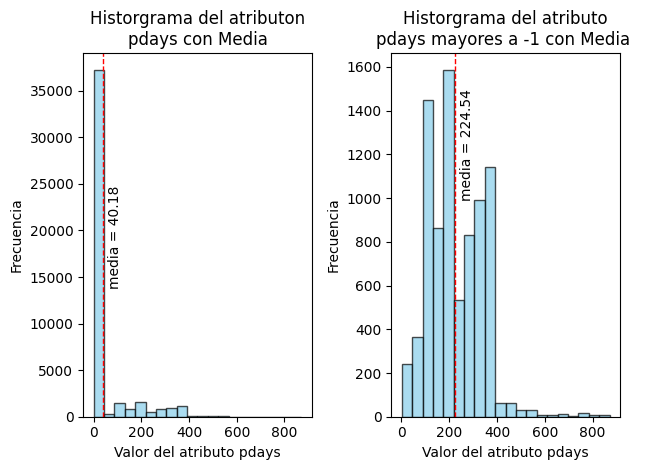

In [81]:
# Graficarun histograma dek atributo "pdays"
plt.subplot(1, 2, 1)
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Agregar una línea verticcal para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)
plt.text(media + 20,14000, f'media = {media:.2f}', rotation=90)

# Etiquetas y titulos
plt.xlabel('Valor del atributo pdays')
plt.ylabel('Frecuencia')
plt.title('Historgrama del atributon\npdays con Media')

# Graficarun histograma dek atributo "pdays" solo valores mayores a -1
plt.subplot(1, 2, 2)
plt.hist(data['pdays'].loc[data['pdays'] > -1], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Agregar una línea verticcal para mostrar la media
plt.axvline(media_filtrada, color='red', linestyle='dashed', linewidth=1)
plt.text(media_filtrada + 20,1000, f'media = {media_filtrada:.2f}', rotation=90)

# Etiquetas y titulos
plt.xlabel('Valor del atributo pdays')
plt.ylabel('Frecuencia')
plt.title('Historgrama del atributo\npdays mayores a -1 con Media ')

# Mostrar gráfica
plt.tight_layout()
plt.show()


In [48]:
# Calcular la desviación estándar
desviacion_estandar = data['pdays'].std()
desviacion_estandar_filtrada = data['pdays'].loc[data['pdays'] > -1].std()

print("La deviación estándar del atributo pdays es: ", desviacion_estandar)
print("La deviación estándar del atributo pdays con valores maores a -1 es: ", desviacion_estandar_filtrada)

La deviación estándar del atributo pdays es:  100.10476807520486
La deviación estándar del atributo pdays con valores maores a -1 es:  115.35607586251724


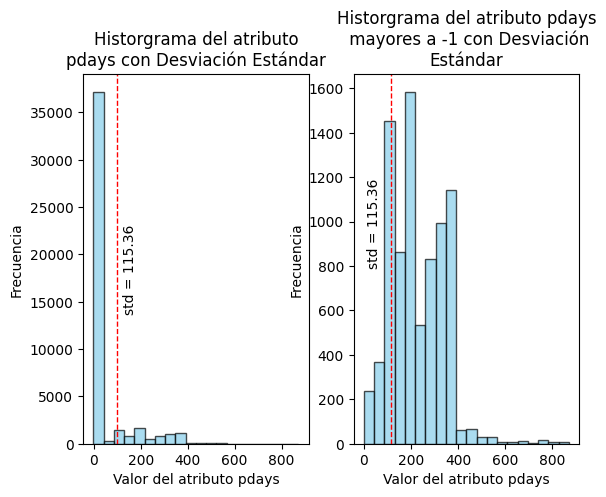

In [73]:
# aux = range(10,800,10)
# for i in aux:
#   print(i)
# Graficarun histograma del atributo "pdays"
plt.subplot(1, 2, 1)
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Agregar una línea verticcal para mostrar la deviación estándar
desviacion_estandar = data['pdays'].std()
plt.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1)
plt.text(desviacion_estandar_filtrada + 10,14000, f'std = {desviacion_estandar_filtrada:.2f}', rotation=90)

# Etiquetas y titulos
plt.xlabel('Valor del atributo pdays')
plt.ylabel('Frecuencia')
plt.title('Historgrama del atributo\npdays con Desviación Estándar')

# Graficarun histograma del atributo "pdays"
plt.subplot(1, 2, 2)
plt.hist(data['pdays'].loc[data['pdays'] > -1], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
# Agregar una línea verticcal para mostrar la deviación estándar
plt.axvline(desviacion_estandar_filtrada, color='red', linestyle='dashed', linewidth=1)
plt.text(desviacion_estandar_filtrada - 100,800, f'std = {desviacion_estandar_filtrada:.2f}', rotation=90)

# Etiquetas y titulos
plt.xlabel('Valor del atributo pdays')
plt.ylabel('Frecuencia')
plt.title('Historgrama del atributo pdays\n mayores a -1 con Desviación\nEstándar')

# Mostrar gráfica
plt.show()

## 4.3. Filas repetidas


In [42]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates( inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)
